In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
from scipy.stats.stats import pearsonr
import matplotlib as mpl

In [6]:
listings = pd.read_csv('C:\\Users\\soumya\\Documents\\CONSUMER ANALYTICS\Project\\CA_Amenities\\CAdata_for_amenities.csv'
                      ,encoding = "ISO-8859-1")

In [20]:
listings.columns.values

array(['Unnamed: 0', 'listing_id', 'listing_name', 'host_id', 'host_name',
       'Host_Since', 'host_location', 'host_response_time',
       'host_response_time_cl', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications_cl', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'zipcode',
       'market', 'smart_location', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_

In [22]:
def select_property_types(x):
    ret = 'not_selected_for_analysis'
    if x =='Apartment':
        ret = 'Apartment'
    elif x == 'House' or x =='Townhouse' or x== 'Villa':
        ret = 'Independent_House'
    elif x =='Condominium':
        ret = 'Condominium'
    return ret

In [23]:
listings['property_type1'] = listings['property_type'].map(select_property_types)

In [41]:
#listings1 = listings[listings.property_type1'property_type1' !='not_selected_for_analysis']
listings1 = listings[~listings['property_type1'].isin(['not_selected_for_analysis'])]


In [45]:
listings2 = listings1[~listings1['property_type1'].isin(['Apartment'])]
listings3 = listings1[~listings1['property_type1'].isin(['Condominium'])]
#listings1.property_type1.values

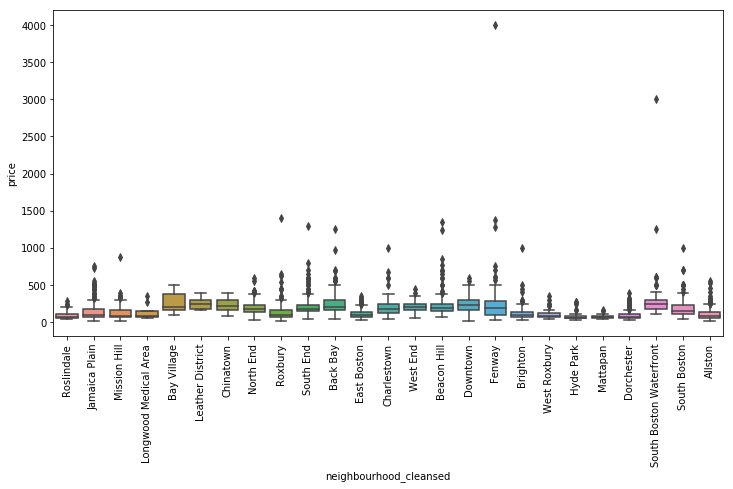

In [7]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'price',  data = listings)
xt = plt.xticks(rotation=90)

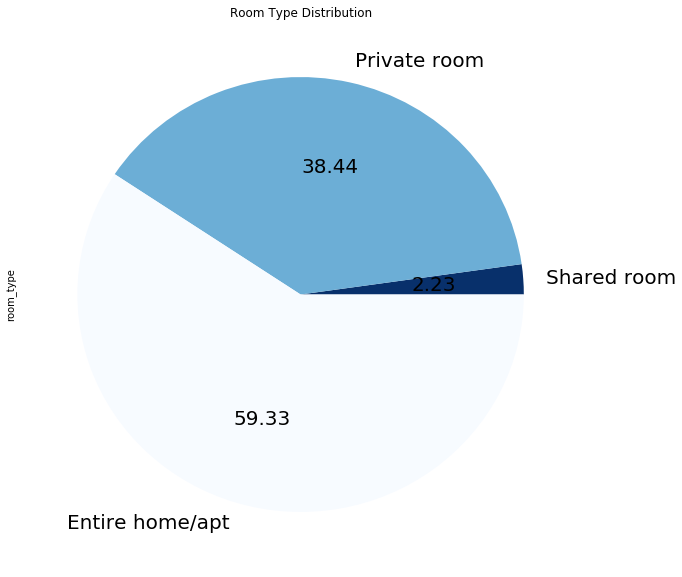

In [16]:
#listings based on room type
from collections import Counter
room = listings.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

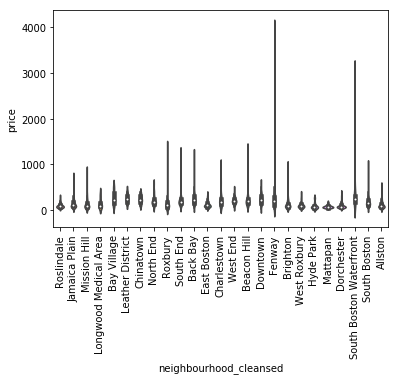

In [8]:
sns.violinplot('neighbourhood_cleansed', 'price', data = listings)
xt = plt.xticks(rotation=90)

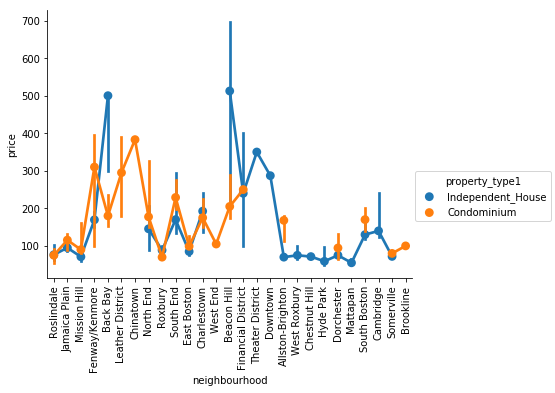

In [46]:
sns.factorplot('neighbourhood', 'price',hue='property_type1', data = listings2, \
               estimator = np.median, size = 4.5,  aspect=1.35)
xt = plt.xticks(rotation=90)

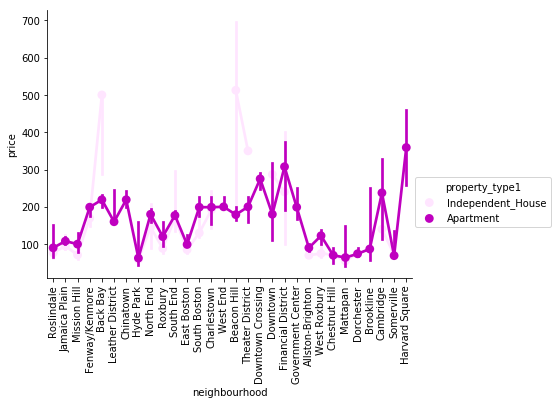

In [48]:
sns.factorplot('neighbourhood', 'price',hue='property_type1', data = listings3,color='m', \
               estimator = np.median, size = 4.5,  aspect=1.35)
xt = plt.xticks(rotation=90)

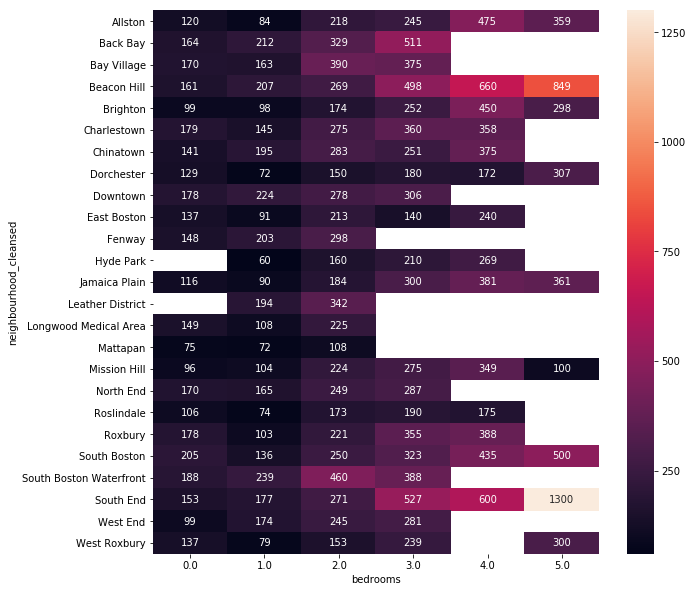

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

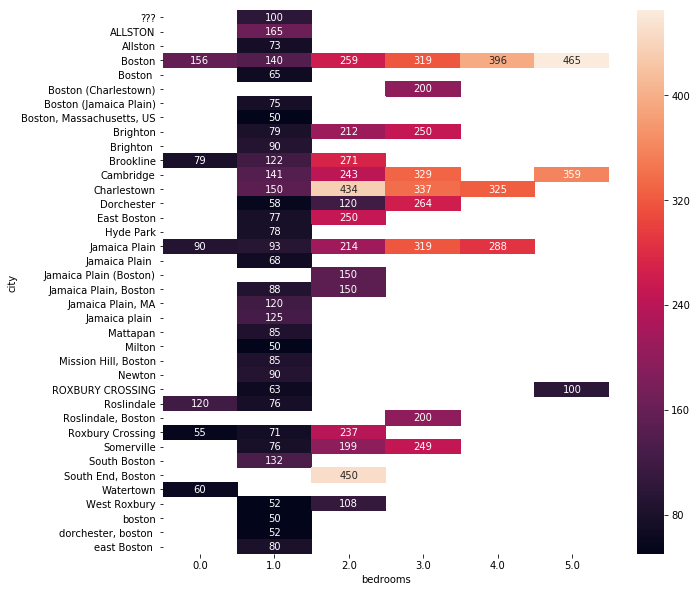

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby([
        'city', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

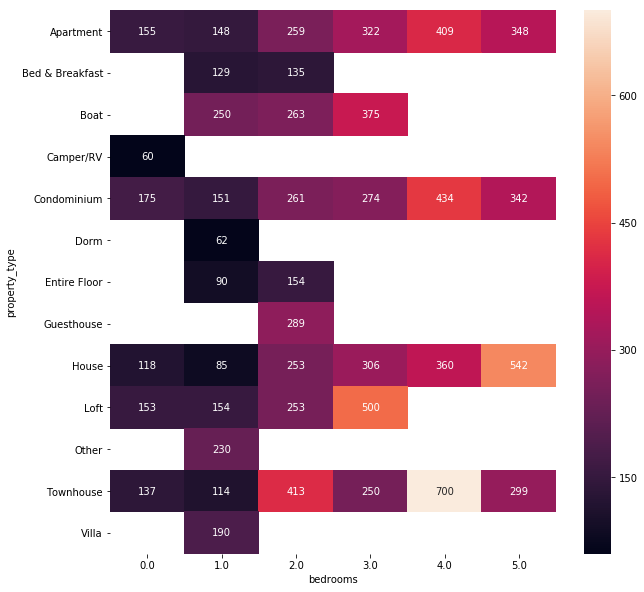

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby(['property_type', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".0f")

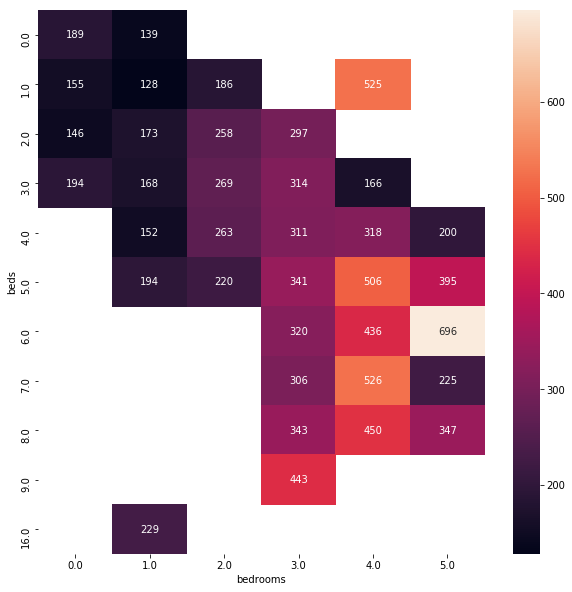

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(listings.groupby(['beds', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".0f")